**Predicting Whether an Individual Default on their Credit Card Payment**

In this project, I used a dataset that contains certain information from 10,000 individuals including their annual income, student status, credit card balance, and whether they dafult or not. I develop a logistical regression model in order to predict whether an individual will default on their credit card payment using the information given in the data.

First, we import numpy and pandas and then load the data:

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

In [2]:
print(data)

     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995      No      No   711.555020  52992.378914
9996      No      No   757.962918  19660.721768
9997      No      No   845.411989  58636.156984
9998      No      No  1569.009053  36669.112365
9999      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]


---
Now we plot our data using a few combinations to get some insights into the dataset.

<AxesSubplot:xlabel='balance', ylabel='income'>

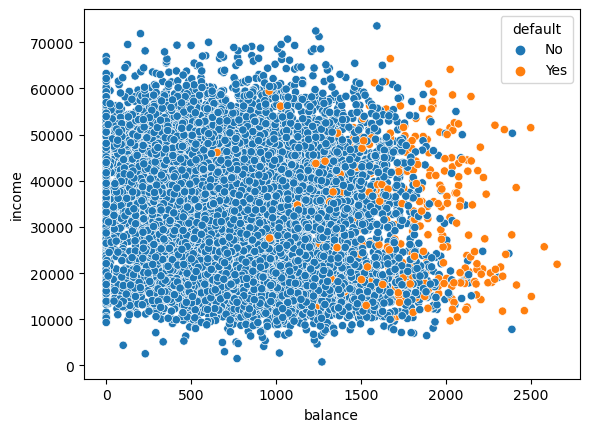

In [3]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")
sns.scatterplot(x='balance', y='income', hue='default', data=data)

<AxesSubplot:xlabel='student', ylabel='income'>

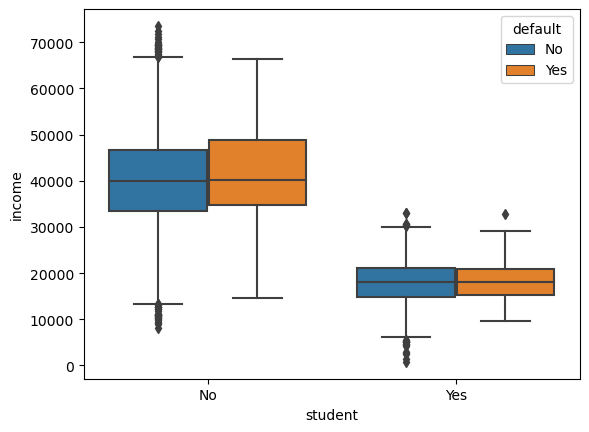

In [4]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")
sns.boxplot(x='student', y='income', hue='default', data=data)

<AxesSubplot:xlabel='student', ylabel='balance'>

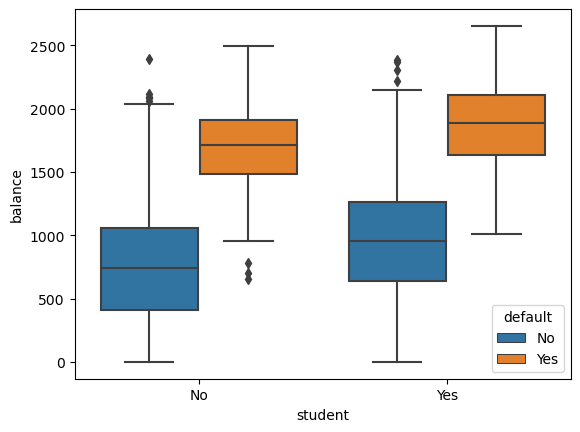

In [5]:
import seaborn as sns
import pandas as pd

data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")
sns.boxplot(x='student', y='balance', hue='default', data=data)

---
Based on the first graph (scatterplot), it is fair to say that the number of people who defaulted is pretty low (orange dots). This might effect the accuracy of our analysis but we shall proceed anyways. The second and third graphs (box plots) show us that students tend to have **lower** income (plot 1) and **higher** balance (plot 2). What's interesting here is that we don't exactly know if being a student or not contributes to default or not. Before getting into more technical analysis to figure that out, it might be helpful to take a look at correlation matrix between these variables to see if student is highly correlated with other variables.

In [6]:
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['default', 'student'])
corr_matrix = df_encoded.corr()

print(corr_matrix)

              balance    income  default_No  default_Yes  student_No  \
balance      1.000000 -0.152243   -0.350119     0.350119   -0.203578   
income      -0.152243  1.000000    0.019871    -0.019871    0.753985   
default_No  -0.350119  0.019871    1.000000    -1.000000    0.035420   
default_Yes  0.350119 -0.019871   -1.000000     1.000000   -0.035420   
student_No  -0.203578  0.753985    0.035420    -0.035420    1.000000   
student_Yes  0.203578 -0.753985   -0.035420     0.035420   -1.000000   

             student_Yes  
balance         0.203578  
income         -0.753985  
default_No     -0.035420  
default_Yes     0.035420  
student_No     -1.000000  
student_Yes     1.000000  


----
It looks like student and balance is mildly correlated means that students tend to hold higher levels of debt.

---> Now we will try to create a model to **classify** default using predictor variables income, balance and student. We create a **logistic regression model** using the following code:

In [7]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Loading the data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# We encode categorical variables - default and student.
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# We then define X and y variables.
X = data.drop('default', axis=1)
y = data['default']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Generate logistic regression report
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.4619
Time:                        16:56:48   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
student       -0.6468      0

------------------------------------------------------------------------------
Now we interpret the regression results. First of all, we notice that the pseudo R-squared value of **0.4619**, which indicates that the model explains **46.19%** of the variation in the response variable. While this is not a high value, it still is a moderate score.

To obtain the probability of defaulting, we can use the logistic function, which converts the log odds to probabilities. The logistic function is: p = 1 / (1 + exp(-z)) where p is the probability of defaulting and z is the linear combination of the predictor variables and their coefficients. For example, the probability of defaulting for a non-student with a balance of 1500 and income of 50,000 is:
    z = -10.8690 + 1500(0.0057) + 50000(3.033e-06) = -0.3435
    p = 1 / (1 + exp(-(-0.3435))) = 0.4147, **so the predicted probability of defaulting for this person is 0.4147 or about 41.47%.**

The coefficients in the logistic regression output represent the change in the log odds of the outcome variable (in this case, the probability of default) associated with a one-unit increase in each predictor variable, holding all other predictors constant. In this specific case, the interpretation of the coefficients is as follows:
- The constant term (intercept) is -10.8690. This represents the log odds of default when all other predictors are 0 (i.e., when the student status is "No", the balance is 0, and the income is 0).
- If the student status is "Yes" (i.e., the person is a student), the log odds of default decrease by 0.6468, compared to when the student status is "No". This means that students are less likely to default, holding balance and income constant. This effect is statistically significant since the p-value is pretty low.
- For each one-unit increase in the balance, the log odds of default increase by 0.0057 and the corresponding p-value is high, so this variable is statistically significant. This means that higher credit card balances are associated with a higher probability of default, holding student status and income constant.
- For each one-unit increase in the income, the log odds of default increase by 3.033e-06, which is a very small effect. This coefficient is not statistically significant (the p-value is 0.712), meaning that we cannot reject the null hypothesis that the coefficient is 0. Therefore, we do not have evidence that income is a significant predictor of default.

In [8]:
import math

# The coefficient for balance
coef_balance = 0.0057

# Exponentiating the coefficient for balance
odds_ratio = math.exp(coef_balance)

# Computing the percentage increase in odds
percent_increase = (odds_ratio - 1) * 100

# Printing the results
print(f"The odds ratio for balance is {odds_ratio:.4f}.")
print(f"For each one-unit increase in balance, the odds of default increase by about {percent_increase:.2f}%.")

The odds ratio for balance is 1.0057.
For each one-unit increase in balance, the odds of default increase by about 0.57%.


To get a more intuitive sense of how these coefficients translate into changes in probability, we could exponentiate each coefficient and interpret it as an odds ratio. For example, exponentiating the coefficient for balance (0.0057) gives an odds ratio of 1.0057. This means that for each one-unit increase in the balance, the odds of default increase by a factor of 1.0057, or about 0.57% (since exp(0.0057) ≈ 1.0057). Similarly we compute odds ratios and percentages for income and student with the following code:

In [9]:
import math

coef_student = -0.6468
coef_income = 3.033e-06

odds_ratio1 = math.exp(coef_student)
odds_ratio2 = math.exp(coef_income)

percent_change1 = (odds_ratio1 - 1) * 100
percent_change2 = (odds_ratio2 - 1) * 100

print(f"The coefficient -0.6468 for student means that all other things being equal, students who are enrolled are estimated to have a lower log-odds of defaulting compared to students who are not enrolled. The odds ratio for student is {odds_ratio1:.4f}.")
print(f"Then the odds of default increase by about {percent_change1:.2f}% which means that, all other things being equal, the odds of defaulting for students who are enrolled are estimated to be about 47.7% lower than the odds of defaulting for students who are not enrolled.")

print(f"The odds ratio for income is {odds_ratio2:.4f}.")
print(f"For each one-unit increase in income, the odds of default increase by about {percent_change2:.2f}% which does not effect at all.")

The coefficient -0.6468 for student means that all other things being equal, students who are enrolled are estimated to have a lower log-odds of defaulting compared to students who are not enrolled. The odds ratio for student is 0.5237.
Then the odds of default increase by about -47.63% which means that, all other things being equal, the odds of defaulting for students who are enrolled are estimated to be about 47.7% lower than the odds of defaulting for students who are not enrolled.
The odds ratio for income is 1.0000.
For each one-unit increase in income, the odds of default increase by about 0.00% which does not effect at all.


---
Next, we build similar regression model but this time without the variable "student" and 'income', in other words, we try to predict the probability of default=yes using only balance.

In [10]:
import statsmodels.api as sm
import pandas as pd

# Load data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# Encode categorical variable
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# Define X and y
X = data.drop(['default','student','income'], axis=1)
y = data['default']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Generate logistic regression report
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                  0.4534
Time:                        16:56:48   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0

---
With this new model, we notice that the pseudo R-squared value of 0.4534, which indicates that the model explains 45.3% which is a bit lower than the previous one. We see now that the coefficent for balance is 0.0055 which didn't really change as much. This, again, means that every $1000 increase in balance is associated with an increase in the log odds of default by 0.0055 units.

---
Next, we build similar regression model but this time without the variable "balance" and 'income', in other words, we try to predict the probability of default=yes using only student.

In [11]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Loading the data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# We encode categorical variables - default and student.
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# We then define X and y variables.
X = data.drop(['default', 'balance', 'income'], axis=1)
y = data['default']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Generate logistic regression report
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Mar 2023   Pseudo R-squ.:                0.004097
Time:                        16:56:48   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.

---
This yielded an interesting result. The variable student has had negative odds coefficient in all the regression tables above but this time it's positive. The coeﬃcient associated with the dummy variable (student) is positive, and the associated p-value is statistically signiﬁcant. This indicates that students tend to have higher default probabilities than non-students.

---> Next, I demonstrate the process of fitting a logistic regression model to data, making predictions on a testing dataset, and evaluating the model's performance using classification metrics.

Specifically, the code will perform the following:

- Split the data into training and testing sets.
- Initialize a logistic regression model.
- Fit the model to the training data.
- Use the model to make predictions on the testing data.
- Evaluate the performance of the model using classification metrics such as precision, recall, and F1-score.
- By performing these steps, the code demonstrates how to use logistic regression to make predictions on a binary outcome variable and assess the accuracy of the predictions.

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# Encode categorical variable
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# Split data into features and target variable
X = data.drop('default', axis=1)
y = data['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.47      0.20      0.28        69

    accuracy                           0.96      2000
   macro avg       0.72      0.60      0.63      2000
weighted avg       0.95      0.96      0.96      2000



---
According to the results, the classifier (the multinomial logistic regression) has high precision and recall for the negative class (labeled as 0 which is no default to credit card debt), with a **precision of 0.97 and a recall of 0.99**. This indicates that the classifier is able to accurately identify negative examples. However, the classifier has much lower precision and recall for the positive class (labeled as 1 which is default to credit card debt), with a **precision of 0.47 and a recall of 0.20**. This suggests that **the classifier is less accurate at identifying positive examples.**

The f1-score for the positive class is also low, at 0.28, indicating that the classifier is not performing well on this class. The overall accuracy of the classifier is high, at 0.96, but this may be misleading given the **class imbalance** in the data since there are many more people who do not default than default in our daataset.

The macro avg and weighted avg metrics provide an overall assessment of the classifier's performance, taking into account the class imbalance in the data. In this case, the macro avg f1-score is 0.63, which is lower than the weighted avg f1-score of 0.96. This suggests that the classifier is better at identifying the negative class, which has more examples, than the positive class, which has fewer examples.

---> We then perform a Wald test for each predictor in the logistic regression model, and compute the associated p-values and exact probabilities. The Wald test is a statistical test that determines whether the coefficients of the predictors in a logistic regression model are significantly different from zero.

In [13]:
import statsmodels.api as sm
import pandas as pd

# Load data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# Encode categorical variable
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# Define X and y
X = data.drop(['default'], axis=1)
y = data['default']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

import numpy as np
from scipy.stats import norm

# Extracting the coefficient values from the logistic regression results
coef = result.params.values

# Extracting the standard errors from the logistic regression results
std_err = result.bse.values

# Computing the Wald test statistic for each predictor
z_values = coef / std_err

# Computing the p-values for each predictor
p_values = 2 * (1 - norm.cdf(abs(z_values)))

# Computing the exact probabilities for each predictor
exact_prob = []
for i in range(len(p_values)):
    if p_values[i] < 0.0001:
        exact_prob.append("<0.0001")
    else:
        exact_prob.append("{:.4f}".format(p_values[i]))

# Printing the exact probabilities for each predictor
for i in range(len(exact_prob)):
    print(f"Exact probability for {result.params.index[i]}: {exact_prob[i]}")

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10
Exact probability for const: <0.0001
Exact probability for student: 0.0062
Exact probability for balance: <0.0001
Exact probability for income: 0.7115


These exact probabilities indicate the probability of obtaining a Wald test statistic as extreme or more extreme than the observed test statistic, assuming that the null hypothesis (i.e., that the predictor's coefficient is equal to zero) is true. A p-value or exact probability that is less than 0.05 suggests that the predictor's coefficient is significantly different from zero, and hence, the predictor is a significant predictor of the outcome variable in the logistic regression model. In this case, again, student and balance are significant predictor of whether a person would default their credit card debt.

---
Next, the natural question is: would dropping student variable from the classifier would land better precision in the data?. We then test that with the following code:

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# Encode categorical variable
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# Split data into features and target variable
X = data.drop(['default', 'student'], axis=1)
y = data['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance; 
#the classification_report function is called with the zero_division parameter set to 0. 
#This will suppress the "UndefinedMetricWarning" messages and set the precision and F-score to 0 for labels with no predicted samples.
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.00      0.00      0.00        69

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



---
Removing "student"column resulted in worse prediction!

The precision and recall for **class 1 are both 0**. This means that the model did not correctly predict any instances of class 1 which is those who defaulted their credit card debt. The f1-score is also 0 for this class, which indicates that the model's performance is very poor for predicting class 1.

The precision, recall, and f1-score for class 0 are all quite high, indicating that the model performs well in predicting class 0 which is again those who did not default to their credit card debt.

The overall accuracy of the model is 0.97, which is quite high. However, accuracy is not always the best metric to evaluate a classification model, especially in cases where there is class imbalance. In this case, the very low performance on class 1 suggests that the model is not performing well overall.

The macro-average of precision, recall, and f1-score is around 0.5, indicating that the model's performance is very poor overall. The weighted-average of these metrics is higher (around 0.95 for f1-score), which reflects the high accuracy of the model in predicting class 0. However, it's important to remember that the model's performance on class 1 is very poor, which may be unacceptable depending on the specific problem and application.

---
We then remove both student and  income to perform a Wald test for the rest of the predictors and run the code again:

In [15]:
import statsmodels.api as sm
import pandas as pd

# Load data
data = pd.read_csv("/Users/100355063/Desktop/Python_data/ISL_Dataset/ALL CSV FILES - 2nd Edition/Default.csv")

# Encode categorical variable
le = LabelEncoder()
data['default'] = le.fit_transform(data['default'])
data['student'] = le.fit_transform(data['student'])

# Define X and y
X = data.drop(['default', 'student', 'income'], axis=1)
y = data['default']

# Add constant to X
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

import numpy as np
from scipy.stats import norm

# Extracting the coefficient values from the logistic regression results
coef = result.params.values

# Extracting the standard errors from the logistic regression results
std_err = result.bse.values

# Computing the Wald test statistic for each predictor
z_values = coef / std_err

# Computing the p-values for each predictor
p_values = 2 * (1 - norm.cdf(abs(z_values)))

# Computing the exact probabilities for each predictor
exact_prob = []
for i in range(len(p_values)):
    if p_values[i] < 0.0001:
        exact_prob.append("<0.0001")
    else:
        exact_prob.append("{:.4f}".format(p_values[i]))

# Printing the exact probabilities for each predictor
for i in range(len(exact_prob)):
    print(f"Exact probability for {result.params.index[i]}: {exact_prob[i]}")

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
Exact probability for const: <0.0001
Exact probability for balance: <0.0001


Once again, balance is significant predictor of whether a person would default their credit card debt.

---
Overall conclusion: credit card balance is an important indicator of whether someone will default or not which is probably an expected outcome. Income did not yield significant impact on default. Being a student also seems to be an important factor although this is effect is a bit unclear since this variable seems to be correlated with balance.

In the logistic regression model with balance, income and student, we see that p-values associated with balance and student are very small, indicating that each of these variables are **associated with the probability of default.** However, the coeﬃcient for student was negative, indicating that students are less likely to default than nonstudents. The negative coeﬃcient for student in the multiple logistic regression indicates that for **a ﬁxed value of balance and income, a student is less likely to default than a non-student.**

We have shown that student and balance are correlated. Students tend to hold higher levels of debt, which is in turn associated with higher probability of default (we concluded that only using student as predictor to the model). In other words, students are more likely to have large credit card balances and thus, tend to be associated with high default probabilty. Thus, even though an individual student with a given credit card balance will tend to have a lower probability of default than a non-student with the same credit card balance, the fact that students on the whole tend to have higher credit card balances means that overall, students tend to default at a higher rate than non-students. This is an important distinction, for instance, for a credit card company that is trying to determine to whom they should oﬀer credit.

**A student is riskier than a non-student if no information about the student’s credit card balance is available. However, that student is less risky than a non-student with the same credit card balance!**